# Import lib & data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from yellowbrick.classifier.rocauc import roc_auc

from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))


In [ ]:
data = pd.read_csv('Consumption.csv', index_col=0)

In [ ]:
data.head()

,Class,H00:00,H00:15,H00:30,H00:45,H01:00,H01:15,H01:30,H01:45,H02:00,...,H21:30,H21:45,H22:00,H22:15,H22:30,H22:45,H23:00,H23:15,H23:30,H23:45
0,0,-0.18611,-0.18611,-0.18611,-0.18611,-0.18611,-0.18611,-0.18611,-0.18611,-0.18611,...,5.99020,2.91270,-0.18611,-0.18611,-0.18611,-0.18611,-0.18611,-0.18611,-0.18611,-0.18611
1,0,-0.17700,-0.17700,-0.17700,-0.17700,-0.17700,-0.17700,-0.17700,-0.17700,-0.17700,...,0.19151,6.47670,1.64510,-0.17700,-0.17700,-0.17700,-0.17700,-0.17700,-0.17700,-0.17700
2,0,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,...,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353,-0.21353
3,0,-0.17147,-0.17147,-0.17147,-0.17147,-0.17147,-0.17147,-0.17147,-0.17147,-0.17147,...,0.16088,0.18043,0.16088,7.35540,1.17750,-0.17147,-0.17147,-0.17147,-0.17147,-0.17147
4,0,-0.16927,-0.16927,-0.16927,-0.16927,-0.16927,-0.16927,-0.16927,-0.16927,-0.16927,...,0.19095,6.07440,0.17093,0.19095,0.19095,7.39520,0.85133,-0.16927,-0.16927,-0.16927


In [ ]:
data['Class'].value_counts()

,count
Class,
4,2406
1,2231
3,1474
2,851
6,728
0,727
5,509


In [ ]:
cls = [str(v) for v in sorted(data['Class'].unique())]
cls

['0', '1', '2', '3', '4', '5', '6']

In [ ]:
for c in data.columns:
    if data[c].isna().sum() > 0:
      print(c, data[c].isna().sum())

# Partition data

In [ ]:
X = data.iloc[:,1:]
y = data.loc[:,'Class']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42,stratify=y) #

In [ ]:
# Standardize
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [ ]:
X_train_s_df = pd.DataFrame(X_train_s)
X_train_s_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,5980.0,0.206688,0.059671,0.0,0.182375,0.199973,0.207922,1.0
1,5980.0,0.271117,0.066937,0.0,0.242918,0.265192,0.274424,1.0
2,5980.0,0.316149,0.065425,0.0,0.288591,0.311060,0.319930,1.0
3,5980.0,0.203614,0.053842,0.0,0.181055,0.199517,0.206909,1.0
4,5980.0,0.203676,0.054751,0.0,0.180211,0.199602,0.206986,1.0
...,...,...,...,...,...,...,...,...
91,5980.0,0.344059,0.089580,0.0,0.305910,0.318130,0.366221,1.0
92,5980.0,0.297210,0.073510,0.0,0.266927,0.279407,0.304574,1.0
93,5980.0,0.406821,0.065523,0.0,0.379654,0.393867,0.407055,1.0
94,5980.0,0.429179,0.054911,0.0,0.407429,0.421456,0.428747,1.0


# kNN

In [ ]:
knn = KNeighborsClassifier()

param = {'n_neighbors':[1,3,5,7,11,15], 'weights': ['distance', 'uniform'],
         'leaf_size': [1,5,10,15,20,30], 'metric': ['l2', 'l1', 'cosine']}

knn_search = GridSearchCV(knn, param, cv=5, n_jobs=-1)
knn_search.fit(X_train_s, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 5, 10, 15, 20, 30],
                         'metric': ['l2', 'l1', 'cosine'],
                         'n_neighbors': [1, 3, 5, 7, 11, 15],
                         'weights': ['distance', 'uniform']})

In [ ]:
show_html(pd.DataFrame(knn_search.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
54,"{'leaf_size': 5, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.734615,1
90,"{'leaf_size': 10, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.734615,1
198,"{'leaf_size': 30, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.734615,1
126,"{'leaf_size': 15, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.734615,1
18,"{'leaf_size': 1, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.734615,1


## Classif. report

In [ ]:
print(classification_report(knn_search.predict(X_test_s), y_test, target_names=cls))

              precision    recall  f1-score   support

           0       0.72      0.54      0.62       317
           1       0.93      0.94      0.94       724
           2       0.59      0.54      0.56       305
           3       0.68      0.57      0.62       581
           4       0.78      0.86      0.82       716
           5       0.32      0.29      0.30       185
           6       0.34      0.69      0.45       118

    accuracy                           0.71      2946
   macro avg       0.62      0.63      0.62      2946
weighted avg       0.72      0.71      0.71      2946



## Confusion matrix

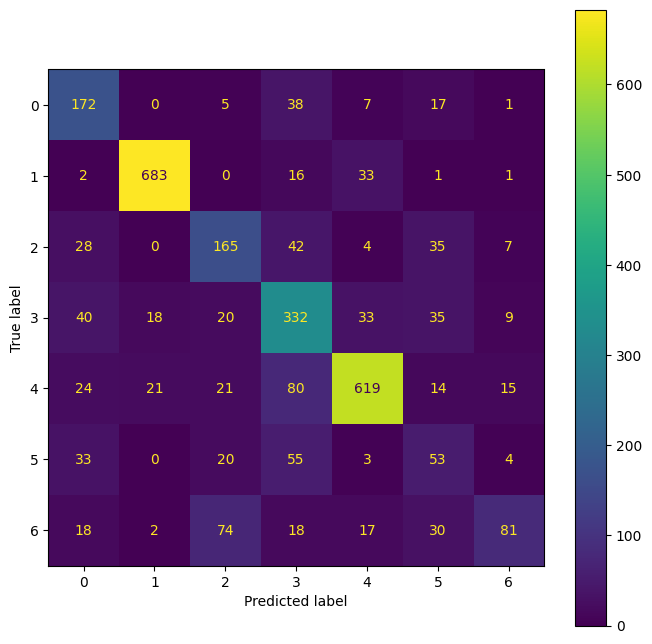

In [ ]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(knn_search,X_test_s, y_test, display_labels=cls, ax=plt.subplot())

## Roc curve

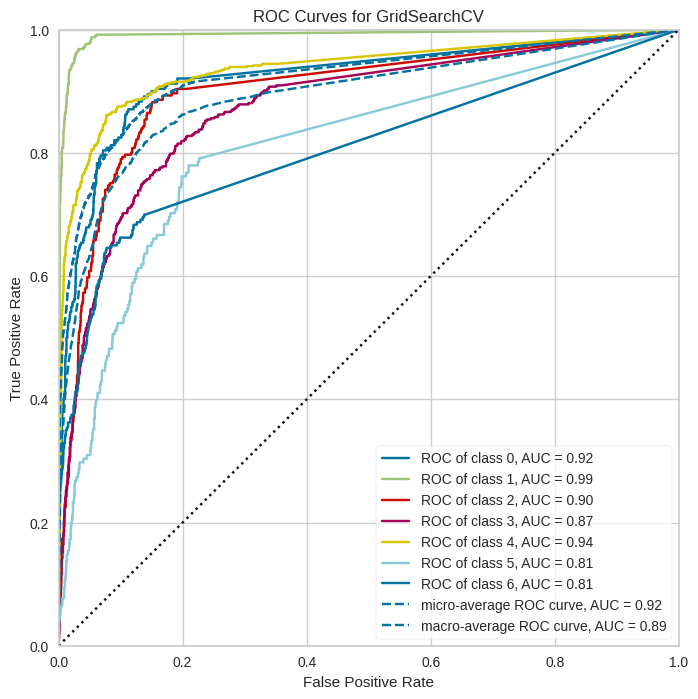

In [ ]:
plt.figure(figsize=(8,8))
roc_auc(knn_search, X_train_s, y_train, X_test_s, y_test, classes=cls);